In [1]:
from google.colab import files
uploaded = files.upload()

Saving y.pickle to y.pickle
Saving X.pickle to X.pickle


In [2]:
!ls

sample_data  X.pickle  y.pickle


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import pickle
import cv2
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

Using TensorFlow backend.


In [0]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
X = X/255.0

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=2)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))
print(X_train.shape)

Training Samples: 1807
Valid Samples: 452
(1807, 32, 32, 1)


1807


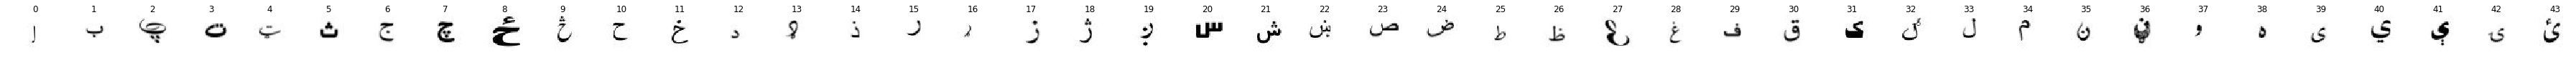

In [6]:
fig, axs = plt.subplots(1, 44, figsize=(50, 2))
fig.tight_layout()
c = 0
print(len(X_train))
for i in range(len(X_train)):
  #print(y_train[i])
  if c == y_train[i] :
    axs[c].imshow(X_train[i].reshape(32, 32),cmap=plt.get_cmap('gray'))
    axs[c].axis('off')
    axs[c].set_title(str(y_train[i]))
    c +=1
    #print("aa",c)
    if c ==44:
      break

In [7]:
num_of_samples=[]
num_of_valid = []
num_classes = 44

for d in range(num_classes):
  #print(y_train[i])
    for i in range(len(X_train)):
        if d == y_train[i] :
            c +=1
    num_of_samples.append(c)
    c = 0

for d in range(num_classes):
  #print(y_train[i])
    for i in range(len(X_valid)):
        if d == y_valid[i] :
            c +=1
    num_of_valid.append(c)
    c = 0
    
print(num_of_samples)
print(num_of_valid)

[95, 44, 48, 43, 40, 46, 40, 39, 39, 37, 40, 44, 42, 35, 43, 44, 42, 40, 44, 41, 38, 43, 44, 47, 39, 39, 38, 33, 39, 38, 41, 39, 42, 39, 38, 38, 39, 45, 43, 40, 44, 40, 40, 39]
[17, 14, 12, 9, 9, 14, 12, 13, 7, 11, 11, 7, 10, 14, 12, 8, 8, 13, 6, 6, 11, 9, 11, 6, 12, 9, 13, 15, 11, 13, 11, 12, 8, 10, 13, 13, 7, 7, 8, 11, 8, 5, 6, 10]


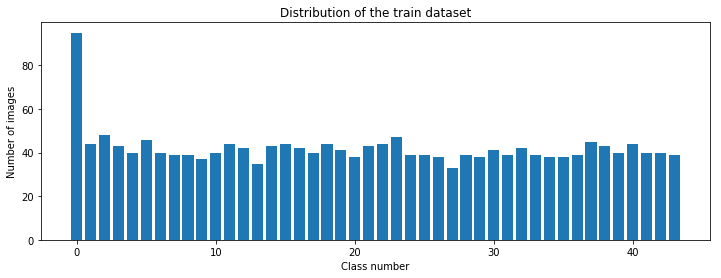

In [8]:
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

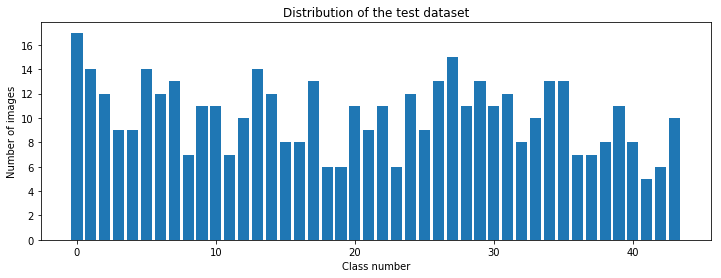

In [9]:
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_valid)
plt.title("Distribution of the test dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

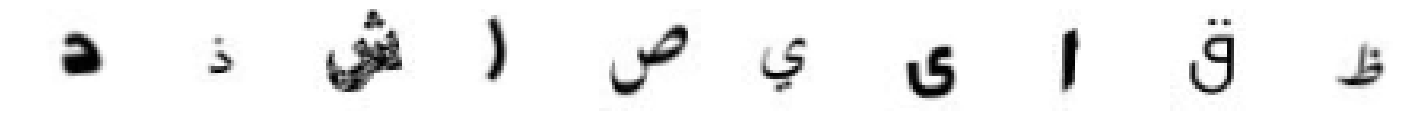

In [10]:
shift = 0.2
datagen = ImageDataGenerator( zoom_range=0.1, shear_range=0.1, rotation_range=10)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
batches = datagen.flow(X_train, y_train, batch_size=10)
X_batch, y_batch = next(batches)
fig, axs = plt.subplots(1, 10, figsize=(20, 2))
fig.tight_layout()
for i in range(10):
  axs[i].imshow(X_batch[i].reshape(32, 32),cmap=plt.get_cmap('gray'))
  axs[i].axis('off')

In [11]:
y_train = to_categorical(y_train, 44)
y_valid = to_categorical(y_valid, 44)
print(y_train[30])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
def lnet_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], activation='relu'))
  #model.add(Conv2D(60, (3, 3), activation='relu'))
  BatchNormalization()
  model.add(Conv2D(32, (3, 3), activation='relu'))
  BatchNormalization()
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))
  #BatchNormalization()
  
 # model.add(Conv2D(90, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  BatchNormalization()
  model.add(Conv2D(64, (3, 3), activation='relu'))
  BatchNormalization()
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.7))
  #BatchNormalization()
  
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  BatchNormalization()
  model.add(Dropout(0.7))
  #model.add(Dense(200, activation='relu'))
  #model.add(Dense(100, activation='relu'))
  #BatchNormalization()
  #model.add(Dropout(0.7))
  model.add(Dense(44, activation='softmax'))
  model.compile(adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [53]:
model = lnet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 5, 5, 64)          0         
__________

In [54]:
history =  model.fit_generator(datagen.flow(X_train, y_train, batch_size=50), steps_per_epoch=3000, epochs = 30, validation_data = (X_valid, y_valid), shuffle = 1)

Epoch 1/30
3000/3000 [==============================] - 42s 14ms/step - loss: 1.7987 - acc: 0.4645 - val_loss: 0.7351 - val_acc: 0.7832
Epoch 2/30
3000/3000 [==============================] - 40s 13ms/step - loss: 0.7925 - acc: 0.7359 - val_loss: 0.4212 - val_acc: 0.8717
Epoch 3/30
3000/3000 [==============================] - 40s 13ms/step - loss: 0.5708 - acc: 0.8097 - val_loss: 0.3614 - val_acc: 0.8872
Epoch 4/30
3000/3000 [==============================] - 40s 13ms/step - loss: 0.4592 - acc: 0.8481 - val_loss: 0.3209 - val_acc: 0.8982
Epoch 5/30
3000/3000 [==============================] - 40s 13ms/step - loss: 0.4001 - acc: 0.8667 - val_loss: 0.3006 - val_acc: 0.9049
Epoch 6/30
3000/3000 [==============================] - 39s 13ms/step - loss: 0.3544 - acc: 0.8846 - val_loss: 0.2594 - val_acc: 0.9226
Epoch 7/30
3000/3000 [==============================] - 39s 13ms/step - loss: 0.3224 - acc: 0.8936 - val_loss: 0.2260 - val_acc: 0.9181
Epoch 8/30
3000/3000 [==========================

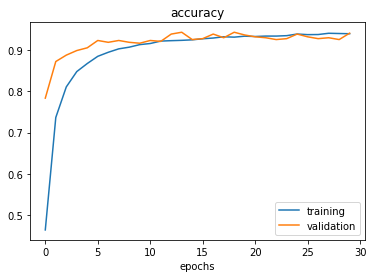

In [55]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'])
plt.title("accuracy")
plt.xlabel("epochs")
plt.show()

In [56]:
score = model.evaluate(X_valid, y_valid)
print('test accuracy ',score[1])

452/452 [==============================] - 0s 114us/step
test accuracy  0.9402654867256637


In [0]:
model.save('p_ocrmodel.h5')

In [0]:
from google.colab import files
files.download('p_ocrmodel.h5')simg = np.asarray(img)


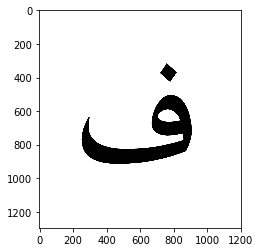

In [76]:
import requests
from PIL import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/6/6d/Arabic_Fa.gif/1200px-Arabic_Fa.gif'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [77]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = img/255
print(img.shape)


(32, 32)


In [78]:
img = img.reshape(1,32, 32, 1)
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [41]
